In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import SimpleITK as sitk

In [2]:
orig_path = '/Users/mona/GitClone/voxelmorph-test/data/data_test'
orig = sorted(glob.glob(f"{orig_path}/*.npy"))

M shape (36864, 30), sigma shape (30, 30), M_avg shape (36864, 30), K shape (30, 30)


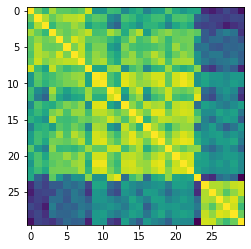

In [7]:
from telnetlib import SSPI_LOGON


array = np.transpose(np.load(orig[0]), (2,1,0))
# create the correlation matrix
x, y, z = array.shape
M = array.reshape(x*y, z)
Sigma = np.diag(np.std(M, axis=0))
M_avg = np.tile(np.average(M, axis=0), (x*y, 1))
K = np.dot(np.dot(np.dot(np.linalg.inv(Sigma), (M - M_avg).T), (M - M_avg)), np.linalg.inv(Sigma)) / (x*y - 1)
print(f"M shape {M.shape}, sigma shape {Sigma.shape}, M_avg shape {M_avg.shape}, K shape {K.shape}")
plt.imshow(K)

[3.74295899e-01 2.07420749e-01 1.73659558e-01 5.59534694e-02
 4.50245998e-02 2.89122300e-02 1.51902308e-02 1.39433815e-02
 9.16703028e-03 7.65246787e-03 5.63641347e-03 5.31910307e-03
 4.48077531e-03 3.73926093e-03 2.97410983e-03 2.78648841e-03
 2.18745143e-03 2.17984813e-03 2.02548937e-03 1.73328731e-03
 1.29587379e-03 1.15487576e-03 1.08046620e-03 1.00809370e-03
 9.30241574e-04 8.01388270e-04 7.42200372e-04 7.01569152e-04
 4.79423474e-04 3.44226415e-16]


<BarContainer object of 30 artists>

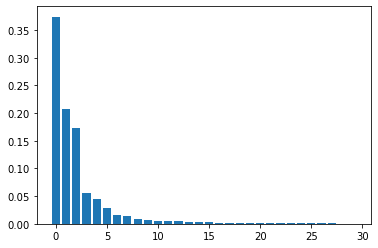

In [4]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(K)
eigenvalues = pca.singular_values_
print(eigenvalues)
plt.bar(np.arange(len(eigenvalues)), eigenvalues)

[9.72911508e-01 1.12190743e-02 6.34947247e-03 3.50157524e-03
 1.53609448e-03 1.32473648e-03 5.76253615e-04 5.05854527e-04
 3.13606481e-04 2.74782354e-04 2.13469248e-04 1.78111926e-04
 1.62414306e-04 1.44418723e-04 1.00922654e-04 9.33709469e-05
 7.48624271e-05 7.26597425e-05 6.75258838e-05 5.99759377e-05
 5.34543190e-05 1.57286012e-05 4.24892806e-05 3.74592525e-05
 2.33732347e-05 2.47347531e-05 2.66728395e-05 3.36244806e-05
 3.19963324e-05 2.97773367e-05]


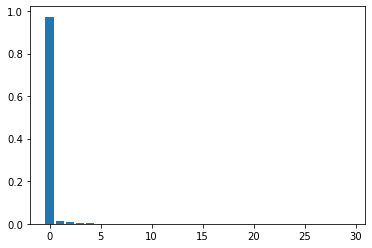

In [32]:
# eig = np.linalg.eigvals(K)
# eig = eig / np.sum(eig)
# plt.bar(np.arange(len(eig)), eig)
# print(eig)

Text(0.5, 1.0, 'Eigenvalues of original image')

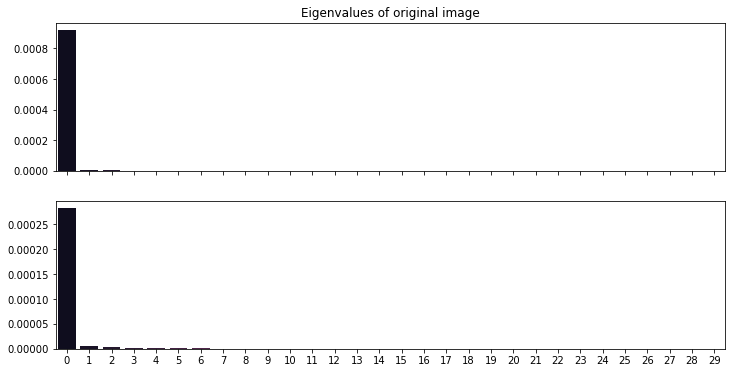

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
sns.barplot(x=np.arange(len(eig)), y=eig, palette="rocket", ax=ax1)
# ax1.axhline(0, color="k", clip_on=False)
sns.barplot(x=np.arange(len(eig)), y=eigenvalues, palette="rocket", ax=ax2)
ax1.set_title(f"Eigenvalues of original image")

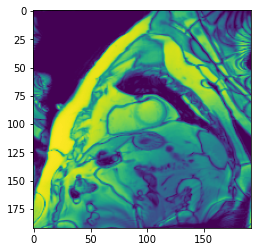

In [12]:
from skimage import exposure
img_eq = exposure.equalize_hist(array)
plt.imshow(img_eq[:,:,15])

In [13]:
np.min(img_eq), np.max(img_eq)

(0.17897316261574073, 1.0)

In [8]:
import pandas as pd

results1 = '/Users/mona/GitClone/voxelmorph-test/data/ncc_b1_inorder/results/results.csv'
results2 = '/Users/mona/GitClone/voxelmorph-test/data/ncc_b1_inorder_0.02/results/results.csv'
results3 = '/Users/mona/GitClone/voxelmorph-test/data/ncc_b1_inorder_0.05/results/results.csv'
results4 = '/Users/mona/GitClone/voxelmorph-test/data/ncc_b1_inorder_0.1/results/results.csv'
results5 = '/Users/mona/GitClone/voxelmorph-test/data/ncc_b1_inorder_histequal/results/results.csv'
results6 = '/Users/mona/GitClone/voxelmorph-test/data/mulinfo_test_v2/results/results.csv'
df1 = pd.read_csv(results1)
df2 = pd.read_csv(results2)
df3 = pd.read_csv(results3)
df4 = pd.read_csv(results4)
df5 = pd.read_csv(results5)
df6 = pd.read_csv(results6)

In [14]:
df1

,Cases,raw MSE,registered MSE,raw PCA,registered PCA,MSE changes percentage,PCA changes percentage
0,0003_rawimages_slice_0.nii,0.006165,0.002163,0.008766,0.008314,-64.912683,-5.152052
1,0004_rawimages_slice_2.nii,0.008027,0.002713,0.006017,0.002762,-66.205871,-54.102347
2,0009_rawimages_slice_1.nii,0.017407,0.005324,0.014501,0.005657,-69.416984,-60.988642
3,0010_rawimages_slice_2.nii,0.010713,0.003959,0.018316,0.007599,-63.045934,-58.511368
4,0015_rawimages_slice_2.nii,0.004835,0.002139,0.003661,0.001387,-55.770104,-62.120858
5,0029_rawimages_slice_0.nii,0.032561,0.009077,0.007703,0.003347,-72.122983,-56.544029
6,0030_rawimages_slice_2.nii,0.033815,0.010733,0.006103,0.002842,-68.260838,-53.436384
7,0031_rawimages_slice_1.nii,0.030377,0.009488,0.019126,0.019415,-68.766536,1.507944
8,0032_rawimages_slice_2.nii,0.038394,0.013312,0.057497,0.041544,-65.327076,-27.746266
9,0033_rawimages_slice_2.nii,0.040512,0.008899,0.035437,0.020643,-78.034298,-41.746624


In [10]:
df_mse = pd.DataFrame()
df_mse = df1[['Cases', 'raw MSE']]
df_pca = pd.DataFrame()
df_pca = df1[['Cases', 'raw PCA']]
# df['Mulinfo registered MSE'] = df1['registered MSE']
df_mse['NCC MSE changes'] = df1['MSE changes percentage']
# df['Mulinfo registered PCA'] = df1['registered PCA']
df_pca['NCC PCA changes'] = df1['PCA changes percentage']

# df['NCC_1 registered MSE'] = df2['registered MSE']
df_mse['NCC_0.02 MSE changes'] = df2['MSE changes percentage']
# df['NCC_1 registered PCA'] = df2['registered PCA']
df_pca['NCC_0.02 PCA changes'] = df2['PCA changes percentage']

# df['NCC_2 registered MSE'] = df3['registered MSE']
df_mse['NCC_0.05 MSE changes'] = df3['MSE changes percentage']
# df['NCC_2 registered PCA'] = df3['registered PCA']
df_pca['NCC_0.05 PCA changes'] = df3['PCA changes percentage']

# df['NCC_3 registered MSE'] = df4['registered MSE']
df_mse['NCC_0.1 MSE changes'] = df4['MSE changes percentage']
# df['NCC_3 registered PCA'] = df4['registered PCA']
df_pca['NCC_0.1 PCA changes'] = df4['PCA changes percentage']

# df['NCC_3 registered MSE'] = df4['registered MSE']
df_mse['NCC_hist MSE changes'] = df5['MSE changes percentage']
# df['NCC_3 registered PCA'] = df4['registered PCA']
df_pca['NCC_hist PCA changes'] = df5['PCA changes percentage']

# df['NCC_3 registered MSE'] = df4['registered MSE']
df_mse['Mul MSE changes'] = df6['MSE changes percentage']
# df['NCC_3 registered PCA'] = df4['registered PCA']
df_pca['Mul PCA changes'] = df6['PCA changes percentage']

/var/folders/ym/lf16jh4j69g64dm2k6wlryzh0000gn/T/ipykernel_19385/2288942500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mse['NCC MSE changes'] = df1['MSE changes percentage']
/var/folders/ym/lf16jh4j69g64dm2k6wlryzh0000gn/T/ipykernel_19385/2288942500.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca['NCC PCA changes'] = df1['PCA changes percentage']
/var/folders/ym/lf16jh4j69g64dm2k6wlryzh0000gn/T/ipykernel_19385/2288942500.py:11: SettingWithCopyWarning: 
A value is trying to be set on a

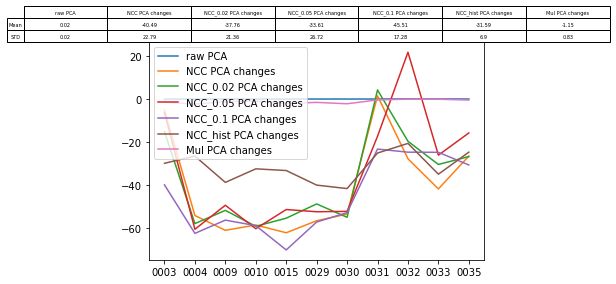

In [11]:
df_pca['id'] = df_pca['Cases'].str[:4]
df_pca.drop(['Cases'], axis=1, inplace=True)
df_pca.set_index('id', inplace=True)
plt.plot(df_pca)
plt.legend(df_pca.columns)
dcsummary = pd.DataFrame([df_pca.mean(), df_pca.std()],index=['Mean','STD'])

plt.table(cellText=np.around(dcsummary.values,2),colWidths = [0.25]*len(df_pca.columns),
          rowLabels=dcsummary.index,
          colLabels=dcsummary.columns,
          cellLoc = 'center', rowLoc = 'center',
          loc='top')
fig = plt.gcf()

# plt.show()
plt.savefig('data/pca_summary.png')


In [12]:
df_pca

,raw PCA,NCC PCA changes,NCC_0.02 PCA changes,NCC_0.05 PCA changes,NCC_0.1 PCA changes,NCC_hist PCA changes,Mul PCA changes
id,,,,,,,
0003,0.008766,-5.152052,-15.117723,-6.327044,-39.857828,-29.848639,-1.453004
0004,0.006017,-54.102347,-57.874322,-60.505196,-62.407033,-26.494021,-2.340698
0009,0.014501,-60.988642,-51.715882,-49.335216,-56.253615,-38.720864,-1.156320
0010,0.018316,-58.511368,-59.125783,-60.240061,-58.813369,-32.424766,-0.943809
0015,0.003661,-62.120858,-55.347422,-51.335463,-70.092672,-33.203495,-2.045686
0029,0.007703,-56.544029,-48.719478,-52.359380,-57.138298,-39.978761,-1.549321
0030,0.006103,-53.436384,-54.936420,-52.186354,-52.748867,-41.592350,-2.185156
0031,0.019126,1.507944,4.230379,-17.299796,-23.233309,-25.078182,-0.406736
0032,0.057497,-27.746266,-19.618923,21.750910,-24.684414,-20.604156,-0.053590


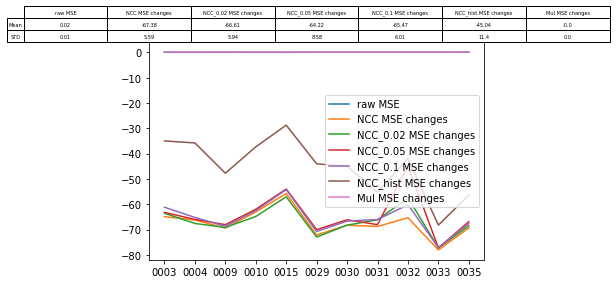

In [13]:
df_mse['id'] = df_mse['Cases'].str[:4]
df_mse.drop(['Cases'], axis=1, inplace=True)
df_mse.set_index('id', inplace=True)
plt.plot(df_mse)
plt.legend(df_mse.columns)
dcsummary = pd.DataFrame([df_mse.mean(), df_mse.std()],index=['Mean','STD'])

plt.table(cellText=np.around(dcsummary.values,2),colWidths = [0.25]*len(df_mse.columns),
          rowLabels=dcsummary.index,
          colLabels=dcsummary.columns,
          cellLoc = 'center', rowLoc = 'center',
          loc='top')
fig = plt.gcf()

# plt.show()
plt.savefig('data/mse_summary.png')

In [7]:
df_mse

,raw MSE,Mulinfo MSE changes,NCC_1 MSE changes,NCC_2 MSE changes,NCC_3 MSE changes,NCC_hist MSE changes
id,,,,,,
0003,0.006165,-0.000063,-64.912683,-63.714300,-62.602190,-34.975130
0004,0.008027,-0.000065,-66.205871,-64.542698,-61.572313,-35.778971
0009,0.017407,-0.000063,-69.416984,-66.159773,-66.508005,-47.735871
0010,0.010713,-0.000083,-63.045934,-60.766398,-59.537134,-37.334329
0015,0.004835,-0.000059,-55.770104,-51.959225,-51.289400,-28.752299
0029,0.032561,-0.000048,-72.122983,-68.378510,-68.944006,-44.032855
0030,0.033815,-0.000064,-68.260838,-66.049954,-65.574428,-45.004384
0031,0.030377,-0.000078,-68.766536,-64.067432,-65.866992,-55.201604
0032,0.038394,-0.000074,-65.327076,-63.002952,-66.282526,-41.978060


In [73]:
list(df_pca[['Mulinfo PCA changes', 'NCC_1 PCA changes', 'NCC_2 PCA changes', 'NCC_3 PCA changes']].mean(axis=0))
list(df_mse[['Mulinfo MSE changes', 'NCC_1 MSE changes', 'NCC_2 MSE changes', 'NCC_3 MSE changes']].mean(axis=0))

[-6.637909877280395e-05,
 -67.38351246677843,
 -64.59197363133713,
 -65.04516194611077]

In [74]:
import seaborn as sns

feature = ['Mulinfo', 'NCC_1', 'NCC_2', 'NCC_3']
df_test = pd.DataFrame()
df_test['Features'] = feature

df_test['PCA'] = list(df_pca[['Mulinfo PCA changes', 'NCC_1 PCA changes', 'NCC_2 PCA changes', 'NCC_3 PCA changes']].mean(axis=0))
df_test['MSE'] = list(df_mse[['Mulinfo MSE changes', 'NCC_1 MSE changes', 'NCC_2 MSE changes', 'NCC_3 MSE changes']].mean(axis=0))
print(df_test)

  Features        PCA        MSE
0  Mulinfo  -1.160576  -0.000066
1    NCC_1 -40.485143 -67.383512
2    NCC_2 -38.784400 -64.591974
3    NCC_3 -37.381167 -65.045162


,Cases,raw MSE,Mulinfo MSE changes,NCC_1 MSE changes,NCC_2 MSE changes,NCC_3 MSE changes
0,0003_rawimages_slice_0.nii,0.006165,-0.000063,-64.912683,-63.714300,-62.602190
1,0004_rawimages_slice_2.nii,0.008027,-0.000065,-66.205871,-64.542698,-61.572313
2,0009_rawimages_slice_1.nii,0.017407,-0.000063,-69.416984,-66.159773,-66.508005
3,0010_rawimages_slice_2.nii,0.010713,-0.000083,-63.045934,-60.766398,-59.537134
4,0015_rawimages_slice_2.nii,0.004835,-0.000059,-55.770104,-51.959225,-51.289400
5,0029_rawimages_slice_0.nii,0.032561,-0.000048,-72.122983,-68.378510,-68.944006
6,0030_rawimages_slice_2.nii,0.033815,-0.000064,-68.260838,-66.049954,-65.574428
7,0031_rawimages_slice_1.nii,0.030377,-0.000078,-68.766536,-64.067432,-65.866992
8,0032_rawimages_slice_2.nii,0.038394,-0.000074,-65.327076,-63.002952,-66.282526
9,0033_rawimages_slice_2.nii,0.040512,-0.000064,-78.034298,-75.902836,-78.385556
